# Assignment: 11 Optimization
Introduction to Numerical Problem Solving, Spring 2017   
Chanh Nguyen 1504202   
Helsinki Metropolia University of Applied Sciences   

In [371]:
# Initial import statements
%pylab inline
import numpy as np
from scipy.optimize import root, minimize

Populating the interactive namespace from numpy and matplotlib


## Exercise 1
Given
$f(x) = −1.5x^6-2x^4+12x$   
(a) Plot the function   
(b) Differentiate the function and then use a root location method to
solve for the maximum f(x) and the corresponding value of x.   
(c) Use minimize function from scipy.optimize to find the maximimum
of the function.   

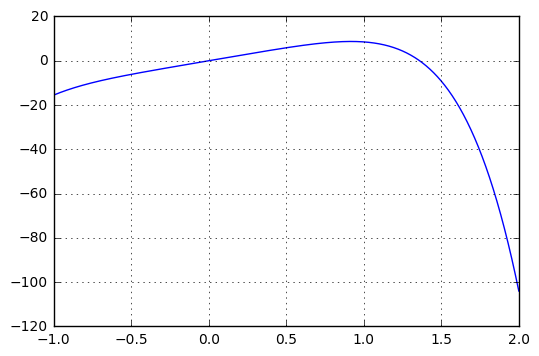

In [372]:
# a) Plot function f(x)
x = linspace(-1, 2, 1000)
def f(x):
    return -1.5*x**6-2*x**4+12*x
y = f(x)
plot(x, y)
grid()

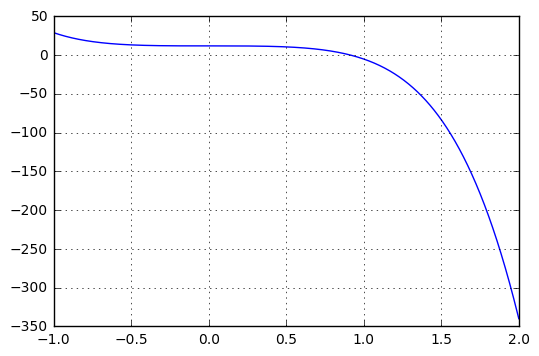

In [373]:
# b) Plot the differencial function of f(x)
def df(x):
    return -9.0*x**5 - 8*x**3 + 12
dy = df(x)
plot(x, dy)
grid()

In [374]:
# Find root of df(x) to determine the maximum of f(x)
r = root(df, 1)
print('The maximum of f(x) is:')
r.x[0], f(r.x[0])

The maximum of f(x) is:


(0.9169151604664324, 8.6979298251970132)

In [375]:
# c) Find maximum by using minimize function of scipy.optimize
def fReverse(x):
    return -f(x)
r = minimize(fReverse, 0)
print('The maximum of f(x) using minimize function is:')
r.x[0], f(r.x[0])

The maximum of f(x) using minimize function is:


(0.91691515198758022, 8.6979298251970114)

## Exercise 2
Solve the problem 1 using the golden-section search. Use initial guesses
of xl = 0.0 and xh = 2.0. Perform 30 iterations. How accurate the
results is then?

In [376]:
def goldenRatioSearch(f, a, b, tol=1e-8, maxiter=100):
    
    # Initilialize the requirements
    r = (sqrt(5)-1)/2
    xopt = (b+a)/2
    fx = f(xopt)
    n = 0
    
    while n < maxiter:
        n += 1
        d = r*(b-a)
        x1 = a+d
        x2 = b-d
        f1 = f(x1)
        f2 = f(x2)
        
        # Shorten the bound
        if f1>f2:
            a = x2
            x2 = x1
            x1 = a+d
            f2 = f1
            f1 = f(x1)
            xopt = x1
            fx = f(xopt)
        else:
            b = x1
            x1 = x2
            x2 = b-d
            f1 = f2
            f2 = f(x2)
            xopt = x1
            fx = f(xopt)
            
        # Check result    
        if xopt != 0:
            ea = (1-r)*abs((b-a)/xopt)
        if ea < tol:
            break
            
    return xopt, fx, ea, n

In [377]:
# The initial guesses of xl = 0.0 and xh = 2.0. Perform 30 iterations
gR = goldenRatioSearch(f, 0, 2, maxiter=30)
gR

(0.91691596032765166, 8.6979298251803847, 4.4781225588606186e-07, 30)

#### Answer: The result by golden-ratio is similar with using differenciation method and minimize function with error is 4.478e-7

## Exercise 3:
Solve the problem 1 using parabolic interpolation method. Use initial
guesses x0 = 0.0, x1 = 1.0 and x2 = 2.0. Iterate until you reach the
same accuracy as in previous problem. Did the parabolic interpolation
find the solution with less or more iterations?

In [378]:
def parabolicInterpolationSearch(f, a, x1, b, tol=1e-8, maxiter=100, step=0):
    r = (sqrt(5)-1)/2
    ea = (1-r)*abs((b-a)/x1)
    
    # Check conditions
    if step>=maxiter or ea<tol:
        return x1, f(x1), ea, step
    
    # Use formular to calculate the minimum of the parabola
    f1 = f(x1)
    fa = f(a)
    fb = f(b)
    A = fa*(x1**2-b**2)+f1*(b**2-a**2)+fb*(a**2-x1**2)
    B = 2*fa*(x1-b)+2*f1*(b-a)+2*fb*(a-x1)
    x3 = A/B
    
    # Recursion with a smaller distance and step increased by 1
    if x1<x3:
        return parabolicInterpolationSearch(f, x1, x3, b, tol, maxiter, step+1)
    else:
        return parabolicInterpolationSearch(f, a, x3, x1, tol, maxiter, step+1)

In [379]:
# The initial guesses x0 = 0.0, x1 = 1.0 and x2 = 2.0. Iterate until you reach the same accuracy as in previous problem.
print('The accurate of the previous golden-ratio method is: '+str(gR[2])) 
pI = parabolicInterpolationSearch(f, 0, 1, 2, tol = gR[2])
pI

The accurate of the previous golden-ratio method is: 4.47812255886e-07


(0.9169151487093956, 8.697929825197011, 5.1637151921549274e-09, 21)

#### Answer: The parabolic interpolation method finds the solution with less step; 21 compares with 30 of golden search

## Exercise 4
Solve the problem 1 using Newton-Raphson optimization method. Use
initial guess of x0 = 2.0. How many iterations are needed to achieve
the same accuracy as in previous problems?

In [380]:
def newtonRaphsonSearch(f, x0, tol=1e-8, maxiter=100):
    
    # Initial requirements
    n = 0
    h = tol
    hh = h**2
    while n<maxiter:
        n+=1
        
        # Calculate first and second order of the differentiation
        fp = (f(x0+h)-f(x0))/h
        fpp = (f(x0+h)-2*f(x0)+f(x0-h))/hh
        if fpp != 0:
            x1 = x0 - fp/fpp
        else:
            x1 = x0 + tol
            
        # Check result    
        if x1 != 0:
            ea = abs((x1-x0)/x1)
        else:
            ea = abs(x1-x0)
        if ea<tol:
            break
        x0 = x1
        
    return x1, f(x1), ea, n 

In [381]:
# The initial guess of x0 = 2.0. Iterate until you reach the same accuracy as in previous problem.
newtonRaphsonSearch(f, 2, tol=gR[2])

(0.9169149366331999, 8.6979298251957111, 2.4973084783360373e-10, 8)

#### Answer: The Newton-Raphson method is even more efficient, only needed 8 iterations with the same accuracy

## Exercise 5
Employ the following methods to find the maximum of $f(x) = 4x − 1.8x^2 + 1.2x^3 − 0.3x^4$   
(a) Golden-section method (xl = −2.0, xu = 4.0, ϵs = 0.0001)   
(b) Parabolic interpolation (x0 = 1.74, x1 = 2.0, x2 = 2.5, iterations = 20).   
(c) Newton-Raphson method (x0 = 3, ϵs = 0.0001).   

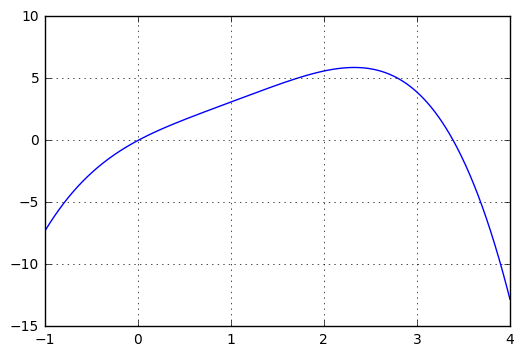

In [382]:
# Define and plot function f(x)
def f(x):
    return 4*x-1.8*x**2+1.2*x**3-0.3*x**4

x = linspace(-1, 4, 1000)
y = f(x)
plot(x, y)
grid()

##### (a) Golden-section method (xl = −2.0, xu = 4.0, ϵs = 0.0001) 

In [383]:
goldenRatioSearch(f, -2, 4, tol=0.0001)

(2.3263255948082673, 5.8853400432518121, 6.5125739233927351e-05, 20)

##### (b) Parabolic interpolation (x0 = 1.74, x1 = 2.0, x2 = 2.5, iterations = 20). 

In [384]:
parabolicInterpolationSearch(f, 1.74, 2, 2.5, maxiter=20)

(2.326350822787675, 5.8853400455195715, 6.1189314319336282e-09, 20)

##### (c) Newton-Raphson method (x0 = 3, ϵs = 0.0001).  

In [385]:
newtonRaphsonSearch(f, 3, 0.0001)

(2.326302401992959, 5.885340037611023, 5.6783671150070043e-08, 5)